In [2]:
import random

In [ ]:
random_number = random.randint(1, 100)

74

# Possible inputs from the user

- 1 < user_guess < 100
- user_guess > 100
- user_guess 1
- non digit
- q


In [33]:
def validate_input(user_guess):
    if not user_guess.isdigit():
        print('Invalid input. please try again, your guess should be  an integer')
        return False
    user_guess = int(user_guess)
    if user_guess > 100 or user_guess < 1:
        print("Your guess is out of range! please try again, your guess should be between 1 and 100")
        return False
    return True

In [37]:
score = 100

while True:
    user_guess = input("Guess a number between 1 and 100: ")
    if user_guess == 'q':
        print('Thank you for playing. Goodbye!')
        break
    if not validate_input(user_guess):
        continue
    user_guess = int(user_guess)
    if user_guess > random_number:
        print('Your guess is too high. please try again.')
    elif user_guess < random_number:
        print('Your guess is too low. please try again.')
    else:
        print('Congratulations! You win!')
        print(f'your score is {score}')
        break
    score -= 10
    score = max(score, 0)


Invalid input. please try again, your guess should be  an integer
Invalid input. please try again, your guess should be  an integer
Thank you for playing. Goodbye!


In [1]:
import random


random_number = random.randint(1, 100)
random_number


66

In [2]:
guess_number  = input('Please enter a number: ')

while True:
    if guess_number == 'q':
        print('Thenks for playing! Googbye.')
        break
    if not guess_number.isdigit():
        print('Please input a valid number! you should input an intiger. Try again')
        continue
    guess_number = int(guess_number)
    if guess_number > 100 or guess_number < 1:
        print("Your entry is out of range. Please enter a number between 1 and 100.")
        continue
    if guess_number > random_number:
        print("Too high! Try again")
    if guess_number < random_number:
        print("too low! Try again")
    else:
        print('congratulations! you win!')
        break


too low! Try again


AttributeError: 'int' object has no attribute 'isdigit'

Kolmogorov distance (d_K): 0.2420
Wasserstein-1 distance (d_W): 0.5518
2C * d_W: 0.4403  (upper bound on d_K)


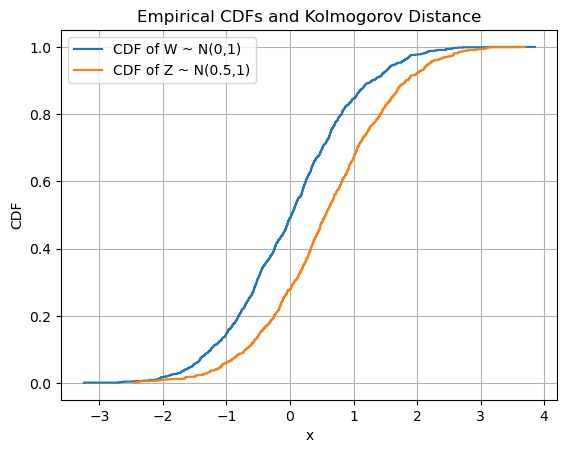

In [3]:
import numpy as np
from scipy.stats import norm
from scipy.stats import wasserstein_distance, ks_2samp
import matplotlib.pyplot as plt

# Generate two random samples
np.random.seed(42)
sample_size = 1000

# W ~ N(0, 1)
W = np.random.normal(loc=0, scale=1, size=sample_size)

# Z ~ N(0.5, 1) (shifted normal)
Z = np.random.normal(loc=0.5, scale=1, size=sample_size)

# Empirical Kolmogorov distance (d_K)
d_k = ks_2samp(W, Z).statistic

# Empirical Wasserstein-1 distance (d_W)
d_w = wasserstein_distance(W, Z)

# Bound: d_K ≤ 2C d_W  if density of Z is bounded by C
# For Z ~ N(μ, σ^2), the density is bounded by 1/(sqrt(2π) * σ)
C = 1 / (np.sqrt(2 * np.pi) * 1)  # since std=1

# Calculate the bound
bound = 2 * C * d_w

# Print results
print(f"Kolmogorov distance (d_K): {d_k:.4f}")
print(f"Wasserstein-1 distance (d_W): {d_w:.4f}")
print(f"2C * d_W: {bound:.4f}  (upper bound on d_K)")

# Optional: plot empirical CDFs
def ecdf(data):
    x = np.sort(data)
    y = np.arange(1, len(data)+1) / len(data)
    return x, y

x_W, y_W = ecdf(W)
x_Z, y_Z = ecdf(Z)

plt.step(x_W, y_W, label='CDF of W ~ N(0,1)')
plt.step(x_Z, y_Z, label='CDF of Z ~ N(0.5,1)')
plt.title("Empirical CDFs and Kolmogorov Distance")
plt.xlabel("x")
plt.ylabel("CDF")
plt.legend()
plt.grid(True)
plt.show()
